In [1]:
import utils_data as ut
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import net
from trainer import train
from transformers import BertForMaskedLM, BertTokenizer

In [2]:
CLASSES = {'MATERIAL': 1,
           'MLIP': 2,
           'O': 0}
N_DATA = 0  # 0 is all
BATCH_SIZE = 1
SEED = 1421
MAX_LENGTH = 512
CLASS_WEIGHTS = [0.1, 0.5, 1]
LEARNING_RATE = 0.0001
N_EPOCHS = 3

In [3]:
ut.seed_everything(SEED)

In [4]:
tokenizerBERT = BertTokenizer.from_pretrained('pranav-s/MaterialsBERT', model_max_length=MAX_LENGTH)
modelBERT = BertForMaskedLM.from_pretrained('pranav-s/MaterialsBERT')
model = net.NERBERTModel(modelBERT.base_model, output_size=len(CLASSES)+1)

Epoch 1
Mean training loss: 0.5691
Mean training accuracy: 0.5078
Test accuracy: 0.7963


Epoch 2
Mean training loss: 0.2723
Mean training accuracy: 0.8557
Test accuracy: 0.8148


Epoch 3
Mean training loss: 0.1552
Mean training accuracy: 0.9195
Test accuracy: 0.4259




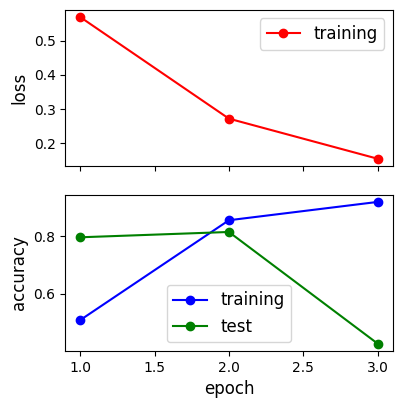

In [5]:
model, train_losses, train_accuracies, test_accuracies, pred_classes, true_classes, pred_all, true_all, data_list = train(model, tokenizerBERT, 
   'data/data_own.json', 'data/data_own_test.json', CLASSES, N_DATA, BATCH_SIZE, SEED, MAX_LENGTH, CLASS_WEIGHTS, LEARNING_RATE, N_EPOCHS, plot=True, save_model=True)

# Sanity check

In [6]:
sample_id = 0
start, end = 0, -1
print(CLASSES)
print()
print(f"Sample {sample_id}, Words {start} to {end}:")
word_list = data_list[sample_id]['words'][start:end]
print(word_list)
print()
print(f"True classes for Sample {sample_id}, Words {start} to {end}:")
labels = true_all[sample_id, start:end]
print(labels)
print(f"Predicted classes for Sample {sample_id}, Words {start} to {end}:")
predictions = pred_all[sample_id, :, :].max(dim=0)[1][start:end]
print(predictions)
print()
print('word', 'label', 'prediction')
for i, v in enumerate(labels):
    if (v != 0 or predictions[i] != 0) and v != 3:
        print(word_list[i], int(v), int(predictions[i]))
    

{'MATERIAL': 1, 'MLIP': 2, 'O': 0}

Sample 0, Words 0 to -1:
['Sodium-ion', 'batteries', '(SIBs)', 'provide', 'a', 'feasible', 'solution', 'for', 'large-scale', 'energy', 'storage', 'applications', 'of', 'sustainable', 'energy', 'resources', 'like', 'wind', 'and', 'solar', 'energy', 'Layered', 'sodium', 'nickel', 'titanates', '(Na2x[NixTi1-x]O2)', '(SNTL)', 'are', 'considered', 'a', 'promising', 'electrode', 'material', 'for', 'SIBs', 'since', 'they', 'can', 'function', 'as', 'either', 'a', 'positive', 'or', 'negative', 'electrode', 'due', 'to', 'the', 'coexistence', 'of', 'high', 'redox', 'potential', 'element', 'Ni', '(V', '=', '3', '7', 'V', 'vs', 'Na/Na+)', 'and', 'low', 'redox', 'potential', 'element', 'Ti', '(V', '=', '0', '7', 'V', 'vs', 'Na/Na+)', 'There', 'have', 'been', 'both', 'experimental', 'and', 'computational', 'studies', 'on', 'the', 'family', 'of', 'Na2x[NixTi1-x]O2', 'materials', 'investigating', 'their', 'structures', 'electrochemical', 'performance', 'electronic', 